In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
epoch_key = ('Roqui', 5, 2)
animal, day, epoch = epoch_key

In [5]:
from src.load_data import get_position_info

pos_df = get_position_info(epoch_key)

Failed to load file: /home/edeno/Documents/Github/pose_analysis/src/../Raw-Data/Roqui/RoquiDIO05.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /home/edeno/Documents/Github/pose_analysis/src/../Raw-Data/Roqui/RoquiDIO05.mat
No DIO file found, inferring correct inbound/outbound from task rules


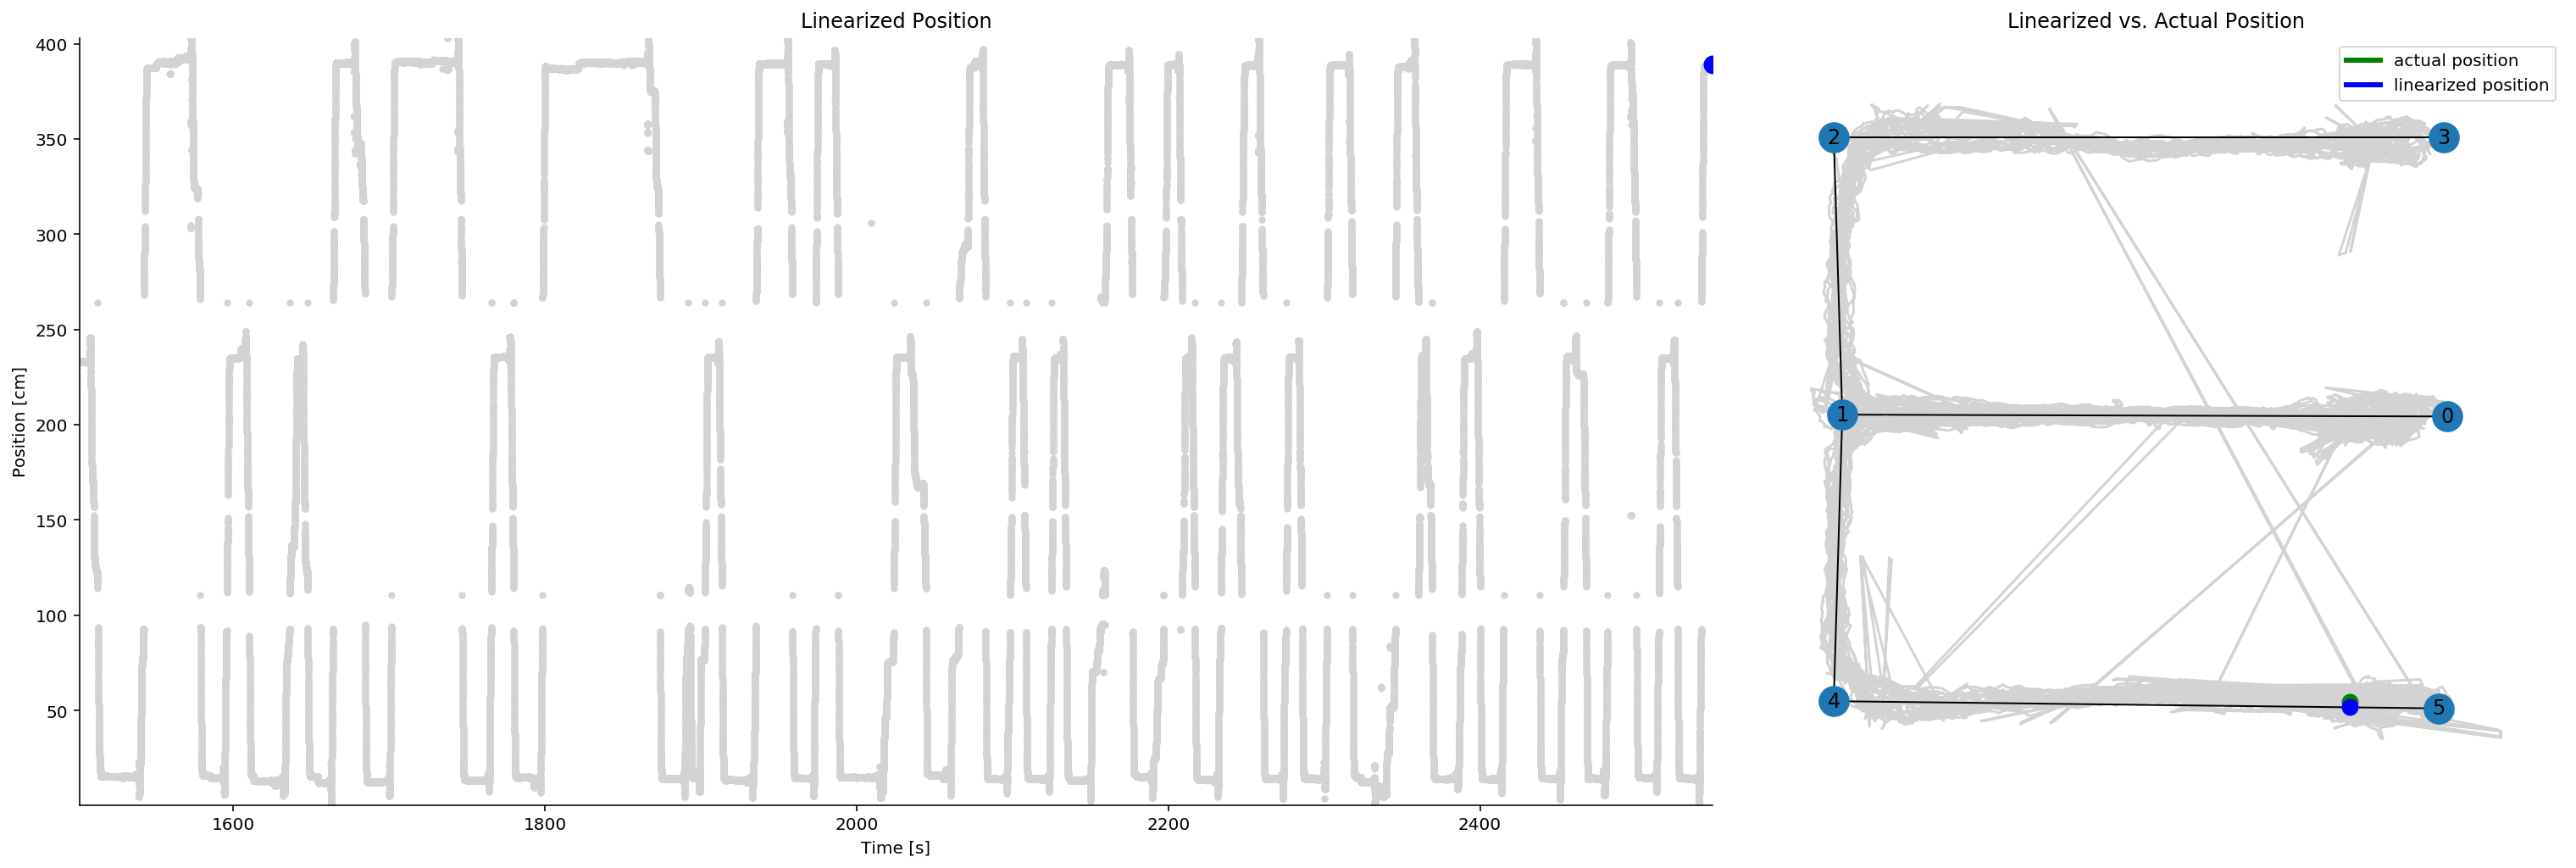

In [10]:
from src.parameters import ANIMALS
from src.visualization import make_actual_vs_linearized_position_movie
from loren_frank_data_processing.position import make_track_graph

track_graph, center_well_id = make_track_graph(epoch_key, ANIMALS)

n_time = pos_df.shape[0]
time_slice = slice(0, n_time)
position_to_linearize=['tailBase_x', 'tailBase_y']

all_position = pos_df.loc[:, position_to_linearize].values
position = pos_df.iloc[time_slice].loc[:, position_to_linearize].values
track_segment_id = pos_df.iloc[time_slice].loc[:, 'track_segment_id'].values.squeeze()

all_linear_position = pos_df.linear_position.values
all_time = pos_df.index.values / np.timedelta64(1, 's')
linear_position = pos_df.iloc[time_slice].linear_position.values
time = pos_df.iloc[time_slice].index.values / np.timedelta64(1, 's')

make_actual_vs_linearized_position_movie(
    track_graph, all_position, position, track_segment_id,
    all_time, all_linear_position, linear_position, time,
    movie_name=f'{animal}_{day:02d}_{epoch:02d}_actual_vs_linearized_position', frame_rate=125)